# Linear Regression

This project was created to combine the study of theory with practice.

## Exercise with regularization techniques:
- Ridge
- Lasso
- Elastic Net

The goal is to predict the cost of insurance
Dataset: https://www.kaggle.com/mirichoi0218/insurance

cvs file information:

- age
- sex, female or male
- bmi, body mass index
- children, covered by health insurance
- smoker, yes or no
- region, area in the US - northeast, southeast, southwest, northwest
- charges, individual medical costs billed by health insurance


## What is Linear Regression?

Linear regression is a model that assumes a linear relationship between the input values (x, independent variable) and a single output value (y, dependent variable)

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # <--
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score



## EDA and Visualizations

In [2]:
# get the data

PATH = os.path.join("dataset")

# load data
def load_data(filename, titanic_path=PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)


df = load_data("insurance.csv")

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# check the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

### Object Values:

- Sex: male, female
- Smoker: no, yes
- Region: southeast, northwest, southwest, northeast

<AxesSubplot:xlabel='children', ylabel='charges'>

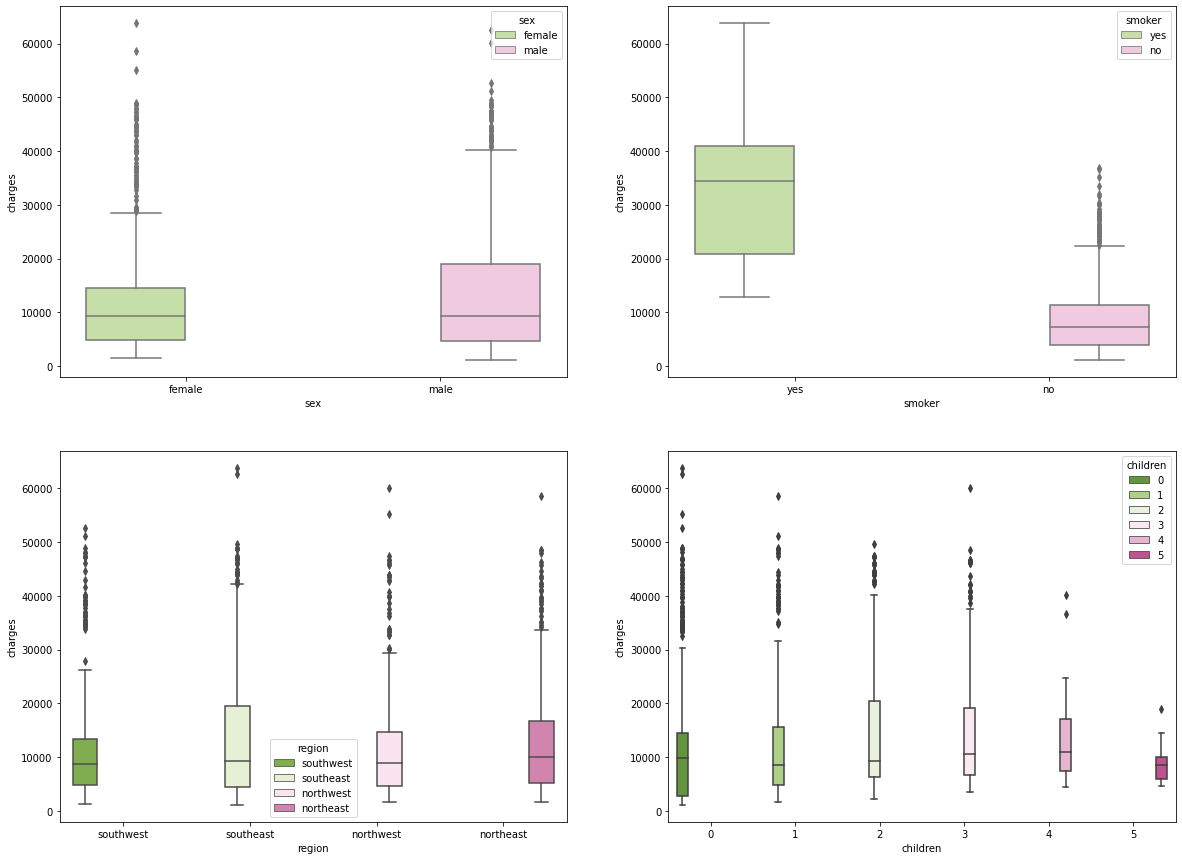

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.boxplot(y="charges", x="sex", data=df, hue="sex", orient="v", palette="PiYG_r", ax=axes[0, 0])
sns.boxplot(y="charges", x="smoker", data=df, hue="smoker", orient="v", palette="PiYG_r", ax=axes[0, 1])
sns.boxplot(y="charges", x="region", data=df, hue="region", orient="v", palette="PiYG_r", ax=axes[1, 0])
sns.boxplot(y="charges", x="children", data=df, hue="children", orient="v", palette="PiYG_r", ax=axes[1, 1])

## Prepare Data

Label Encoder to encode string values into numeric fields (sex, smoker, region)

In [11]:
encode = LabelEncoder()

encode.fit(df.sex.drop_duplicates())
df.sex = encode.transform(df.sex)

encode.fit(df.smoker.drop_duplicates())
df.smoker = encode.transform(df.smoker)

encode.fit(df.region.drop_duplicates())
df.region = encode.transform(df.region)

In [12]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [13]:
# data correlations

print("Charges Correlation: \n{}".format(df.corr()["charges"].sort_values()))

Charges Correlation: 
region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


<AxesSubplot:>

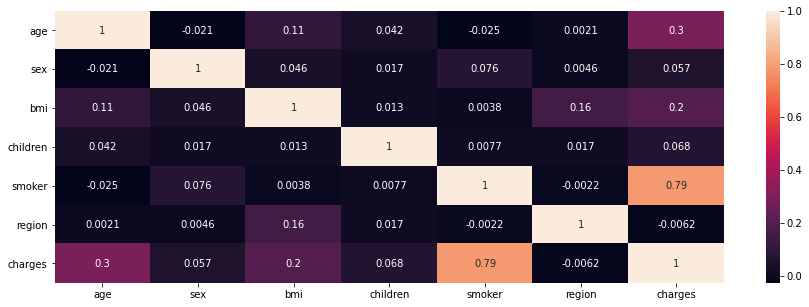

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)


## Test Train Data

In [15]:
X = df.drop(["charges"], axis=1)
y = df["charges"]

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Transform Data

Standard Scaler to transform data so that its distribution has a mean value of 0 and a standard deviation of 1

In [17]:

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


- print_evalutate to display the R2 score and MSE (Mean Squared Error) evaluation metrics on the screen
- evaluate to estimate the R2 score and MSE (Mean Squared Error) evaluation metrics and then save them in a new dataframe

In [18]:

def print_evaluate(d_set, pred):  
    mse = mean_squared_error(d_set, pred)
    r2 = r2_score(d_set, pred)
    
    print("MSE: {}".format(mse))
    print("R2:  {}".format(r2))
    
def evaluate(d_set, pred):
    mse = mean_squared_error(d_set, pred)
    r2 = r2_score(d_set, pred)
    return mse, r2

## Linear Regression

Adapt the Linear Regression model to the training set with .fit   


In [19]:
lr = LinearRegression().fit(X_train, y_train)
lr.coef_

array([ 3.61610865e+03, -9.39295411e+00,  2.02830858e+03,  5.16662566e+02,
        9.55714338e+03, -3.02387980e+02])

In [20]:
y_pred_train = lr.predict(X_train)

print_evaluate(y_train, y_pred_train)


MSE: 37280663.22256598
R2:  0.7417049283233981


In [21]:
y_pred_test = lr.predict(X_test)

print_evaluate(y_test, y_pred_test)


MSE: 33635210.43117844
R2:  0.7833463107364536


In [22]:
results_df = pd.DataFrame(data=[["Linear Regression", * evaluate(y_test, y_pred_test)]], 
                                 columns=["Model", "MSE", "R2"])
results_df

,Model,MSE,R2
0,Linear Regression,3.363521e+07,0.783346


## Ridge Regression

The Ridge Estimator reduces the regression coefficients so that they are close to zero by penalizing them with the L2 Norm. So as to reduce the complexity of the model.

RidgeCV to find the best value for alpha thanks to cross-validation

In [23]:
# calculate the penalty value, given by the alpha coefficient

# RidgeCV fits a cross-validated ridge regression model

ridge_cv = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4],
                  store_cv_values=True)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_


1.0

In [24]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print_evaluate(y_test, y_pred)



MSE: 33641818.58882587
R2:  0.7833037457661384


In [25]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", * evaluate(y_test, y_pred)]],
                                 columns=["Model", "MSE", "R2"])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MSE,R2
0,Linear Regression,3.363521e+07,0.783346
1,Ridge Regression,3.364182e+07,0.783304


## Lasso Regression

Lasso Regression reduces the regression coefficients towards zero, penalizing the model with the L1 Norm, the sum of the absolute coefficients.

In [26]:
lasso = Lasso(alpha=1.000).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print_evaluate(y_test, y_pred)

lasso.score(X_test, y_test)


MSE: 33637843.01629289
R2:  0.7833293535279202


0.7833293535279202

In [27]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", * evaluate(y_test, y_pred)]], 
                                 columns=["Model", "MSE", "R2"])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MSE,R2
0,Linear Regression,3.363521e+07,0.783346
1,Ridge Regression,3.364182e+07,0.783304
2,Lasso Regression,3.363784e+07,0.783329


## Elastic Net

Elastic Net Regression combines the properties of Ridge and Lasso regression, penalizing the model using L2 Norm and L1 Norm

In [28]:
elastic = ElasticNet(alpha=0.005).fit(X_train, y_train)
y_pred = elastic.predict(X_test)

print_evaluate(y_test, y_pred)

MSE: 33653333.51454886
R2:  0.7832295749461108


In [29]:
results_df_2 = pd.DataFrame(data=[["Elastic Net", * evaluate(y_test, y_pred)]], 
                                 columns=["Model", "MSE", "R2"])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MSE,R2
0,Linear Regression,3.363521e+07,0.783346
1,Ridge Regression,3.364182e+07,0.783304
2,Lasso Regression,3.363784e+07,0.783329
3,Elastic Net,3.365333e+07,0.783230


In [30]:
results_df.sort_values(by=["MSE"], inplace=True, ascending=False)
results_df


,Model,MSE,R2
3,Elastic Net,3.365333e+07,0.783230
1,Ridge Regression,3.364182e+07,0.783304
2,Lasso Regression,3.363784e+07,0.783329
0,Linear Regression,3.363521e+07,0.783346
